In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os
import jpype
import math
if not jpype.isJVMStarted():
    jpype.startJVM()
import asposecells
from asposecells.api import Workbook, LoadOptions, SaveFormat, FileFormatType

In [26]:
path_str = str(os.getcwd())
path_str = path_str + '/Data/'
dir_list_tmp = os.listdir(path_str)

dir_list = []
for i in dir_list_tmp:
    if '.csv' in i:
        dir_list.append(i)

In [27]:
if not jpype.isJVMStarted():
    jpype.startJVM()
path_str_tmp = str(os.getcwd())

path_str_tmp = path_str_tmp + '/Data_Excel/'
for f in os.listdir(path_str_tmp):
    os.remove(os.path.join(path_str_tmp, f))
    
for i in dir_list:
    name = path_str + i
    # Create CSV LoadOptions object
    loadOptions =  LoadOptions(FileFormatType.CSV)

    # Create a Workbook object with CSV file's path and the loadOptions
    workbook =  Workbook(name, loadOptions)

    # Save CSV as XLSX
    excel_name = path_str_tmp + i.split('.')[0] + ".xlsx" 

    workbook.save(excel_name , SaveFormat.XLSX)

In [28]:
path_str = str(os.getcwd())
path_str = path_str + '/Data_Excel/'
dir_list_tmp = os.listdir(path_str)

dir_list = []
for i in dir_list_tmp:
    if '.xlsx' in i:
        dir_list.append(i)

In [29]:
count = 0
df_master = pd.DataFrame()
for i in dir_list:
    name = path_str + i
    df_tmp = pd.read_excel(name)
    df_tmp = df_tmp.iloc[3:]
    if count == 0:
        df_master['Freq'] = df_tmp.iloc[:,0]
    
    col_name = 'CH3_Upper_Envelope_' + str(count) 
    count = count + 1
    df_master[col_name] = df_tmp.iloc[:,11]

In [30]:
k_val = float(input('Please enter k value. \n'))

Please enter k value. 
1.67


In [31]:
mean_lst = []
std_lst = []
upper_limit = []
for i in range(0,len(df_master)):
    mean_val = statistics.mean(df_master.iloc[i,1:])
    mean_lst.append(mean_val)
    std_val = statistics.stdev(df_master.iloc[i,1:])
    std_lst.append(std_val)
    
    upper_val = mean_val + (k_val * std_val)
    
    upper_limit.append(upper_val)

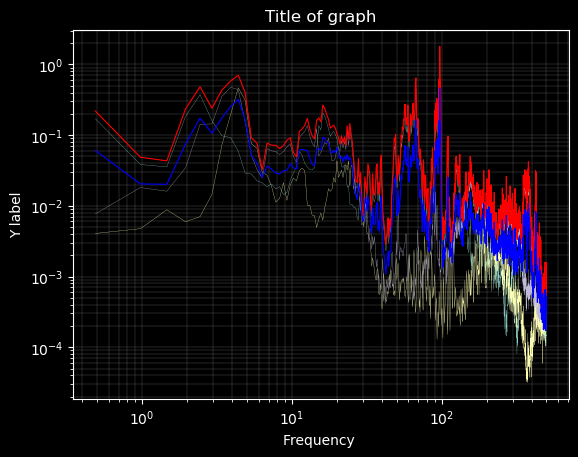

<Figure size 640x480 with 0 Axes>

In [32]:
plt.style.use('dark_background')
for i in df_master.columns:
    if 'Freq' not in i:
        x = df_master['Freq']
        y = df_master[i]
        plt.loglog(x, y, linewidth=0.2)

x = df_master['Freq']
y = upper_limit
plt.loglog(x, y, linewidth=0.8, color = "red")

x = df_master['Freq']
y = mean_lst
plt.loglog(x, y, linewidth=0.8, color = "blue")

plt.xlabel("Frequency ")
plt.ylabel("Y label")
plt.title("Title of graph")
plt.grid(True,which='both',linewidth=0.2,color = "gray")

fig1 = plt.gcf()
plt.show()
plt.draw()
path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Graphs/full_graph.png'
fig1.savefig(path_str_tmp, dpi=2000)

In [33]:
mean_lst_200 = []
std_lst_200 = []
upper_limit_200 = []
lower_limit_200 = []
df_master_200 = df_master[df_master['Freq']<200.0001]
for i in range(0,len(df_master_200)):
    mean_val = statistics.mean(df_master_200.iloc[i,1:])
    mean_lst_200.append(mean_val)
    std_val = statistics.stdev(df_master_200.iloc[i,1:])
    std_lst_200.append(std_val)

    upper_val = mean_val + (k_val * std_val)
    lower_val = mean_val - (k_val * std_val)

    upper_limit_200.append(upper_val)
    lower_limit_200.append(lower_val)

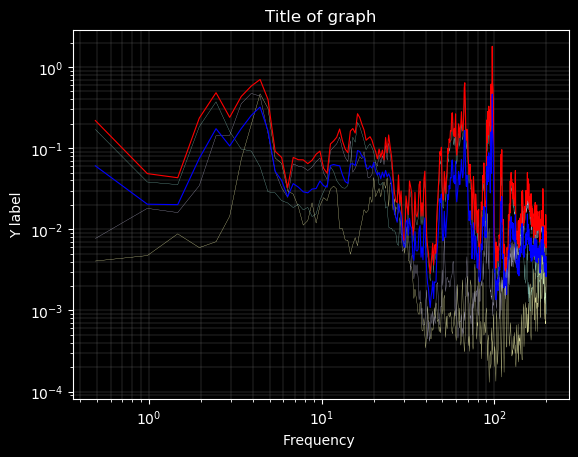

<Figure size 640x480 with 0 Axes>

In [34]:
plt.style.use('dark_background')

for i in df_master_200.columns:
    if 'Freq' not in i :
        x = df_master_200['Freq']
        y = df_master_200[i]
        plt.loglog(x, y, linewidth=0.2)

x = df_master_200['Freq']
y = upper_limit_200
plt.loglog(x, y, linewidth=0.8, color = "red")

x = df_master_200['Freq']
y = mean_lst_200
plt.loglog(x, y, linewidth=0.8, color = "blue")

plt.xlabel("Frequency ")
plt.ylabel("Y label")
plt.title("Title of graph")
plt.grid(True,which='both',linewidth=0.2,color = "gray")

fig1 = plt.gcf()
plt.show()
plt.draw()
path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Graphs/200_graph.png'
fig1.savefig(path_str_tmp, dpi=2000)

In [35]:
df_master = df_master.reset_index(drop=True)

In [36]:
df_master['average'] = mean_lst
df_master['upper'] = upper_limit

In [37]:
df_master.loc[len(df_master)] = 0
df_master.loc[len(df_master)] = 0

In [38]:
count = 0
for j in df_master.columns:
    if 'Freq' not in j:
        val_list = []
        val_list.append(0)
        for i in range(0,len(df_master)-3):
            up_val1 = df_master.iloc[i][j]
            up_val2 = df_master.iloc[i+1][j]
            frq_val1 = df_master.iloc[i][0]
            frq_val2 = df_master.iloc[i+1][0]
            val_list.append(0.5*(up_val1+up_val2)/(frq_val1/frq_val2))
        
        col_name = 'Val_'+str(count)
        count = count + 1
        sum_val = sum(val_list)
        sqrt_val = math.sqrt(sum(val_list))
        val_list.append(sum_val)
        val_list.append(sqrt_val)
        if 'average' in j:
            col_name = 'average_val'
        if 'upper' in j:
            col_name = 'upper_val'
        df_master.loc[:,col_name]= pd.Series(val_list)
#         df_master[col_name] = pd.Series(val_list)

In [39]:
df_master

Freq CH3_Upper_Envelope_0 CH3_Upper_Envelope_1 CH3_Upper_Envelope_2   
0     0.488281             0.170197             0.004066             0.007698  \
1     0.976562             0.038296             0.004746             0.018124   
2     1.464844             0.035549             0.008788             0.016082   
3     1.953125             0.184195             0.005948             0.034534   
4     2.441406             0.372744             0.007032             0.141986   
...        ...                  ...                  ...                  ...   
1020  498.5351              0.00015             0.001143             0.000216   
1021  499.0234             0.000144             0.000977             0.000335   
1022  499.5117              0.00022             0.000441             0.000288   
1023         0                    0                    0                    0   
1024         0                    0                    0                    0   

       average     upper      Val_0     Val_1     Val_2  average_val   
0     0.060654  0.219111   0.000000  0.000000  0.000000     0.000000  \
1     0.020389  0.048594   0.208494  0.008813  0.025822     0.081043   
2     0.020140  0.043243   0.055384  0.010150  0.025655     0.030396   
3     0.074893  0.234765   0.146496  0.009824  0.033744     0.063355   
4     0.173921  0.482763   0.348087  0.008113  0.110325     0.155508   
...        ...       ...        ...       ...       ...          ...   
1020  0.000503  0.001431   0.000144  0.001200  0.000199     0.000514   
1021  0.000485  0.001214   0.000147  0.001061  0.000276     0.000494   
1022  0.000317  0.000506   0.000182  0.000710  0.000312     0.000401   
1023  0.000000  0.000000  20.443309  3.338967  9.544783    11.109020   
1024  0.000000  0.000000   4.521428  1.827284  3.089463     3.333020   

      upper_val  
0      0.000000  
1      0.267705  
2      0.068878  
3      0.185339  
4      0.448455  
...         ...  
1020   0.001507  
1021   0.001323  
1022   0.000861  
1023  33.611402  
1024   5.797534  

[1025 rows x 11 columns]

In [40]:
# mean_val = statistics.mean(mean_lst)
# mean_sqrt = statistics.sqrt(mean_val)
# mean_lst.append(mean_val)
# mean_lst.append(mean_sqrt)

# mean_val = statistics.mean(upper_limit)
# mean_sqrt = statistics.sqrt(mean_val)
# upper_limit.append(mean_val)
# upper_limit.append(mean_sqrt)

# df_master['average'] = mean_lst
# df_master['upper'] = upper_limit

In [41]:
path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Master_Data/master_df_full.xlsx'
df_master.to_excel(path_str_tmp,index=False)
df_master.to_csv(path_str_tmp,index=False)

In [42]:
df_master_200

Freq CH3_Upper_Envelope_0 CH3_Upper_Envelope_1 CH3_Upper_Envelope_2
3    0.488281             0.170197             0.004066             0.007698
4    0.976562             0.038296             0.004746             0.018124
5    1.464844             0.035549             0.008788             0.016082
6    1.953125             0.184195             0.005948             0.034534
7    2.441406             0.372744             0.007032             0.141986
..        ...                  ...                  ...                  ...
407  197.7539             0.001652             0.000745             0.006403
408  198.2422             0.001419             0.000687             0.011926
409  198.7305             0.001619             0.001495              0.01052
410  199.2187             0.001104             0.001863             0.004871
411   199.707             0.000904             0.002755             0.007479

[409 rows x 4 columns]

In [43]:
df_master_200['average'] = mean_lst_200
df_master_200['upper'] = upper_limit_200

In [44]:
df_master_200 = df_master_200.reset_index(drop=True)
df_master_200.loc[len(df_master_200)] = 0
df_master_200.loc[len(df_master_200)] = 0

In [45]:
df_master_200

Freq CH3_Upper_Envelope_0 CH3_Upper_Envelope_1 CH3_Upper_Envelope_2   
0    0.488281             0.170197             0.004066             0.007698  \
1    0.976562             0.038296             0.004746             0.018124   
2    1.464844             0.035549             0.008788             0.016082   
3    1.953125             0.184195             0.005948             0.034534   
4    2.441406             0.372744             0.007032             0.141986   
..        ...                  ...                  ...                  ...   
406  198.7305             0.001619             0.001495              0.01052   
407  199.2187             0.001104             0.001863             0.004871   
408   199.707             0.000904             0.002755             0.007479   
409         0                    0                    0                    0   
410         0                    0                    0                    0   

      average     upper  
0    0.060654  0.219111  
1    0.020389  0.048594  
2    0.020140  0.043243  
3    0.074893  0.234765  
4    0.173921  0.482763  
..        ...       ...  
406  0.004545  0.013187  
407  0.002613  0.005940  
408  0.003712  0.009375  
409  0.000000  0.000000  
410  0.000000  0.000000  

[411 rows x 6 columns]

In [46]:
count = 0
for j in df_master_200.columns:
    if 'Freq' not in j:
        val_list = []
        val_list.append(0)
        for i in range(0,len(df_master_200)-3):
            if df_master_200['Freq'][i] < 200.0001:
                up_val1 = df_master_200.iloc[i][j]
                up_val2 = df_master_200.iloc[i+1][j]
                frq_val1 = df_master_200.iloc[i][0]
                frq_val2 = df_master_200.iloc[i+1][0]
                val_list.append(0.5*(float(up_val1)+float(up_val2))/(frq_val1/frq_val2))
            else:
                break
        
        col_name = 'Val_'+str(count)
        count = count + 1
        sum_val = sum(val_list)
        sqrt_val = math.sqrt(sum(val_list))
        val_list.append(sum_val)
        val_list.append(sqrt_val)
        if 'average' in j:
            col_name = 'average_val'
        if 'upper' in j:
            col_name = 'upper_val'
        df_master_200.loc[:,col_name]= pd.Series(val_list)

In [48]:
path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Master_Data/master_df_200.xlsx'
df_master_200.to_excel(path_str_tmp,index=False)
df_master_200.to_csv(path_str_tmp,index=False)

In [49]:
df_master_200

Freq CH3_Upper_Envelope_0 CH3_Upper_Envelope_1 CH3_Upper_Envelope_2   
0    0.488281             0.170197             0.004066             0.007698  \
1    0.976562             0.038296             0.004746             0.018124   
2    1.464844             0.035549             0.008788             0.016082   
3    1.953125             0.184195             0.005948             0.034534   
4    2.441406             0.372744             0.007032             0.141986   
..        ...                  ...                  ...                  ...   
406  198.7305             0.001619             0.001495              0.01052   
407  199.2187             0.001104             0.001863             0.004871   
408   199.707             0.000904             0.002755             0.007479   
409         0                    0                    0                    0   
410         0                    0                    0                    0   

      average     upper      Val_0     Val_1     Val_2  average_val  upper_val  
0    0.060654  0.219111   0.000000  0.000000  0.000000     0.000000   0.000000  
1    0.020389  0.048594   0.208494  0.008813  0.025822     0.081043   0.267705  
2    0.020140  0.043243   0.055384  0.010150  0.025655     0.030396   0.068878  
3    0.074893  0.234765   0.146496  0.009824  0.033744     0.063355   0.185339  
4    0.173921  0.482763   0.348087  0.008113  0.110325     0.155508   0.448455  
..        ...       ...        ...       ...       ...          ...        ...  
406  0.004545  0.013187   0.001522  0.001094  0.011251     0.004622   0.014218  
407  0.002613  0.005940   0.001365  0.001683  0.007715     0.003588   0.009587  
408  0.003712  0.009375   0.001006  0.002315  0.006190     0.003170   0.007676  
409  0.000000  0.000000  18.243645  2.880394  7.527464     9.550501  28.902504  
410  0.000000  0.000000   4.271258  1.697172  2.743622     3.090388   5.376105  

[411 rows x 11 columns]